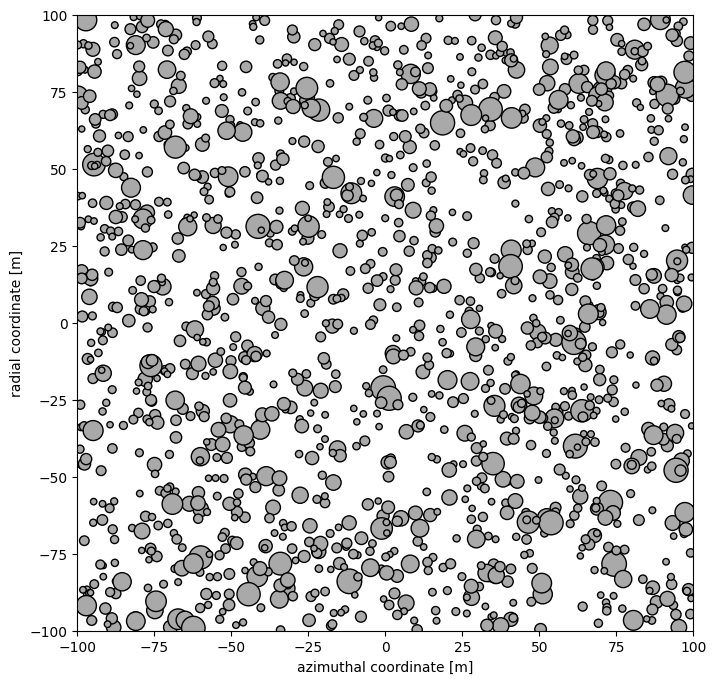

In [1]:
import rebound
import numpy as np
sim = rebound.Simulation()
OMEGA = 0.00013143527     # [1/s]
sim.ri_sei.OMEGA = OMEGA
surface_density = 400.    # kg/m^2
particle_density = 400.   # kg/m^3
sim.G = 6.67428e-11       # N m^2 / kg^2
sim.dt = 1e-3*2.*np.pi/OMEGA
sim.softening = 0.2       # [m]
boxsize = 200.            # [m]
sim.configure_box(boxsize)
sim.N_ghost_x = 2
sim.N_ghost_y = 2
sim.integrator = "sei"
sim.boundary   = "shear"
sim.gravity    = "tree"
sim.collision  = "tree"
sim.collision_resolve = "hardsphere"
def cor_bridges(r, v):
        eps = 0.32*pow(abs(v)*100.,-0.234)
        if eps>1.:
            eps=1.
        if eps<0.:
            eps=0.
        return eps
sim.coefficient_of_restitution = cor_bridges
def powerlaw(slope, min_v, max_v):
    y = np.random.uniform()
    pow_max = pow(max_v, slope+1.)
    pow_min = pow(min_v, slope+1.)
    return pow((pow_max-pow_min)*y + pow_min, 1./(slope+1.))
total_mass = 0.
while total_mass < surface_density*(boxsize**2):
    radius = powerlaw(slope=-3, min_v=1, max_v=4)  # [m]    
    mass = particle_density*4./3.*np.pi*(radius**3)
    x = np.random.uniform(low=-boxsize/2., high=boxsize/2.)
    sim.add(
        m=mass,
        r=radius,
        x=x,
        y=np.random.uniform(low=-boxsize/2., high=boxsize/2.),
        z=np.random.normal(),
        vx = 0.,
        vy = -3./2.*x*OMEGA, 
        vz = 0.)
    total_mass += mass
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plotParticles(sim):
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111,aspect='equal')
    ax.set_ylabel("radial coordinate [m]")
    ax.set_xlabel("azimuthal coordinate [m]")
    ax.set_ylim(-boxsize/2.,boxsize/2.)
    ax.set_xlim(-boxsize/2.,boxsize/2.)

    for i, p in enumerate(sim.particles):
        circ = patches.Circle((p.y, p.x), p.r, facecolor='darkgray', edgecolor='black')
        ax.add_patch(circ)

plotParticles(sim)

1.3169190944192862e-06


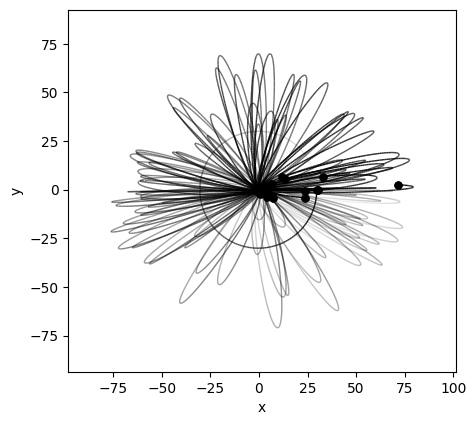

In [2]:
import rebound
import numpy as np
sim = rebound.Simulation()
np.random.seed(42)

#integrator options
sim.integrator = "trace"
sim.dt = 1
sim.testparticle_type = 1

#collision and boundary options
sim.collision = "direct"
sim.collision_resolve = "merge"
sim.collision_resolve_keep_sorted = 1
sim.boundary = "open"
boxsize = 200.
sim.configure_box(boxsize)
sim.track_energy_offset = 1

#simulation time
tmax = 1e4
#massive bodies
sim.add(m=1., r=0.005)                     # Sun
a_neptune = 30.05
sim.add(m=5e-5,r=2e-4,a=a_neptune,e=0.01)  # Neptune

sim.N_active = sim.N
# semi-active bodies
n_comets = 100
a = np.random.random(n_comets)*10 + a_neptune
e = np.random.random(n_comets)*0.009 + 0.99
inc = np.random.random(n_comets)*np.pi/2.
m = 1e-10
r = 1e-7

for i in xrange(0,n_comets):
    rand = np.random.random()*2*np.pi
    sim.add(m=m, r=r, a=a[i], e=e[i], inc=inc[i], Omega=0, omega=rand, f=rand)
sim.move_to_com()
E0 = sim.energy()
%matplotlib inline
op = rebound.OrbitPlot(sim,Narc=300)
sim.integrate(tmax)
dE = abs((sim.energy() - E0)/E0)
print(dE)